In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

2024-10-22 13:42:30.863160: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-22 13:42:30.877485: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 13:42:30.980989: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 13:42:31.095311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 13:42:31.192324: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
data = np.random.rand(1000,32)

In [5]:
data = (data - data.min())/(data.max()-data.min())

In [6]:
inputs = layers.Input(shape=(32,))
encoded = layers.Dense(16,activation='relu')(inputs)

In [7]:
decoded = layers.Dense(32,activation='sigmoid')(encoded)

In [8]:
autoencoder = models.Model(inputs,decoded)

In [11]:
autoencoder.compile(optimizer='adam',loss='mse')

In [12]:
autoencoder.fit(data,data,epochs=50,batch_size=32,verbose=0)

In [13]:
decoded_data = autoencoder.predict(data)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
print('orginal data',data[0])
print('Decoded data',decoded_data[0])

orginal data [0.19307596 0.53229759 0.51384836 0.62167941 0.43468618 0.97422249
 0.53197402 0.69382725 0.14415697 0.85981316 0.70893947 0.10657491
 0.22311606 0.95978631 0.40138434 0.44559876 0.63088314 0.72226311
 0.51394684 0.45537118 0.58663492 0.38005802 0.48332966 0.8309651
 0.03988036 0.56635767 0.01919553 0.12494573 0.50533141 0.55592014
 0.05158052 0.07974876]
Decoded data [0.26726294 0.58016074 0.5860362  0.39051482 0.5087501  0.61671513
 0.7811011  0.58440626 0.42084554 0.7788742  0.687009   0.30197302
 0.41117886 0.579118   0.5308829  0.5902554  0.6617813  0.8800307
 0.409571   0.32416773 0.32290435 0.4824961  0.399219   0.56499577
 0.40806097 0.52477777 0.41528687 0.49658787 0.32750922 0.4914019
 0.520597   0.38132805]


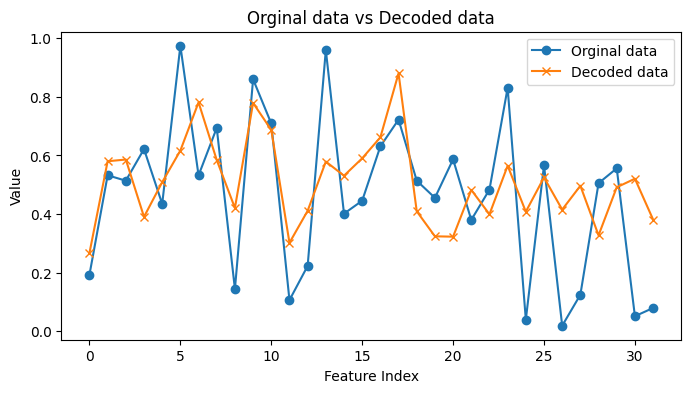

In [17]:
plt.figure(figsize=(8,4))
plt.plot(data[0],label = 'Orginal data',marker ='o')
plt.plot(decoded_data[0],label= 'Decoded data' , marker = 'x')
plt.title('Orginal data vs Decoded data')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()